In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
cfile = pd.read_csv("timeseries.csv")

# Overview of the Dataset
The dataset contains information about a hospital <br>
The dataset contains 39 columns and an unknown rows<br>
The dataset contains 19539 entries<br>
Below is the summary of the dataset

In [3]:
cfile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   date                                    501 non-null    object 
 1   country                                 501 non-null    object 
 2   state                                   501 non-null    object 
 3   county                                  0 non-null      float64
 4   fips                                    501 non-null    int64  
 5   lat                                     0 non-null      float64
 6   long                                    0 non-null      float64
 7   locationId                              501 non-null    object 
 8   actuals.cases                           492 non-null    float64
 9   actuals.deaths                          492 non-null    float64
 10  actuals.positiveTests                   496 non-null    float6

In [4]:
# the size of the dataset

cfile.size 

19539

In [5]:
#the first five rows of the dataset

cfile.head()

,date,country,state,county,fips,lat,long,locationId,actuals.cases,actuals.deaths,...,metrics.infectionRate,metrics.infectionRateCI90,metrics.icuHeadroomRatio,metrics.icuHeadroomDetails,metrics.icuCapacityRatio,riskLevels.overall,metrics.vaccinationsInitiatedRatio,metrics.vaccinationsCompletedRatio,actuals.newDeaths,actuals.vaccinesAdministered
0,2020-03-02,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
1,2020-03-03,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,2020-03-04,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
3,2020-03-05,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
4,2020-03-06,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN


In [6]:
#the last five rows of the dataset

cfile.tail()

,date,country,state,county,fips,lat,long,locationId,actuals.cases,actuals.deaths,...,metrics.infectionRate,metrics.infectionRateCI90,metrics.icuHeadroomRatio,metrics.icuHeadroomDetails,metrics.icuCapacityRatio,riskLevels.overall,metrics.vaccinationsInitiatedRatio,metrics.vaccinationsCompletedRatio,actuals.newDeaths,actuals.vaccinesAdministered
496,2021-06-21,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,1215116.0,27623.0,...,0.68,0.12,NaN,NaN,NaN,1,0.619,0.485,2.0,13631788.0
497,2021-06-22,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,1215239.0,27655.0,...,0.68,0.14,NaN,NaN,NaN,1,0.620,0.486,32.0,13651077.0
498,2021-06-23,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,1215374.0,27662.0,...,0.67,0.16,NaN,NaN,NaN,1,0.621,0.487,7.0,13679110.0
499,2021-06-24,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,1215735.0,27675.0,...,0.67,0.18,NaN,NaN,NaN,1,0.622,0.489,13.0,13715484.0
500,2021-06-25,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN


In [7]:
# I used this code to checked the duplicate
cfile.duplicated

<bound method DataFrame.duplicated of            date country state  county  fips  lat  long          locationId  \
0    2020-03-02      US    PA     NaN    42  NaN   NaN  iso1:us#iso2:us-pa   
1    2020-03-03      US    PA     NaN    42  NaN   NaN  iso1:us#iso2:us-pa   
2    2020-03-04      US    PA     NaN    42  NaN   NaN  iso1:us#iso2:us-pa   
3    2020-03-05      US    PA     NaN    42  NaN   NaN  iso1:us#iso2:us-pa   
4    2020-03-06      US    PA     NaN    42  NaN   NaN  iso1:us#iso2:us-pa   
..          ...     ...   ...     ...   ...  ...   ...                 ...   
496  2021-06-21      US    PA     NaN    42  NaN   NaN  iso1:us#iso2:us-pa   
497  2021-06-22      US    PA     NaN    42  NaN   NaN  iso1:us#iso2:us-pa   
498  2021-06-23      US    PA     NaN    42  NaN   NaN  iso1:us#iso2:us-pa   
499  2021-06-24      US    PA     NaN    42  NaN   NaN  iso1:us#iso2:us-pa   
500  2021-06-25      US    PA     NaN    42  NaN   NaN  iso1:us#iso2:us-pa   

     actuals.cases  actua

In [8]:
#passing the date as an index

cfile.set_index('date',inplace = True)

In [10]:
#Displaying the row of the date below
from datetime import date

print(date(2021,3,1).strftime("%d-%B-%Y"))

mounth_03 = cfile.loc["2021-03-01"]
print(mounth_03)
cas21_03 = mounth_03['actuals.cases']
vac21_03 = mounth_03['actuals.vaccinationsCompleted']

01-March-2021
country                                                   US
state                                                     PA
county                                                   NaN
fips                                                      42
lat                                                      NaN
long                                                     NaN
locationId                                iso1:us#iso2:us-pa
actuals.cases                                       938308.0
actuals.deaths                                       24065.0
actuals.positiveTests                              1002242.0
actuals.negativeTests                             10227547.0
actuals.contactTracers                                  1508
actuals.hospitalBeds.capacity                            NaN
actuals.hospitalBeds.currentUsageTotal               23242.0
actuals.hospitalBeds.currentUsageCovid                2117.0
actuals.hospitalBeds.typicalUsageRate                    NaN
actuals.ic

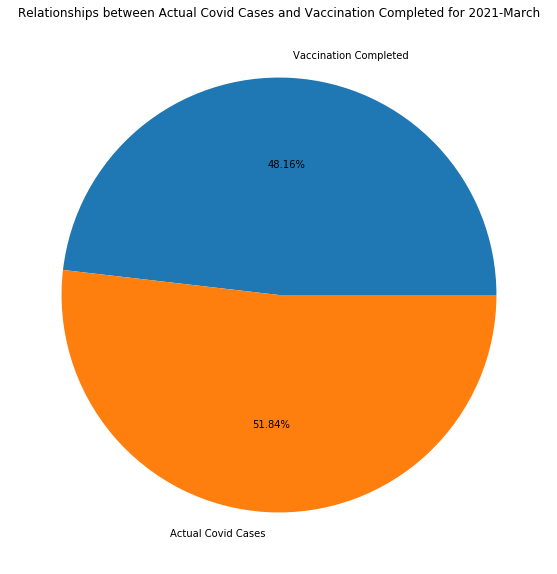

In [11]:
size_03 = [vac21_03,cas21_03]
labels = "Vaccination Completed","Actual Covid Cases",  
plt.figure(figsize=(10,10))
plt.pie(size_03, labels = labels, autopct='%.2f%%')
plt.title('Relationships between Actual Covid Cases and Vaccination Completed for 2021-March')
plt.show()

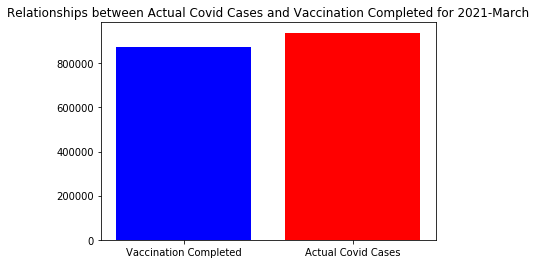

In [12]:
plt.bar(x = labels, height = size_03, color = ("blue", "red"))
plt.title('Relationships between Actual Covid Cases and Vaccination Completed for 2021-March')
plt.show()

# The relationship between Actual cases and Vaccination completed on March 2021
*The visualization above shows the relationship between actual cases and vaccination completed*<br>
*On the *pie chart*, the vaccination completed is the **blue in color** and the actual cases is in the **orange in color**, but on the *bar chart* the vaccination completed is the **blue in color** and the actual cases is in the **red in color**

On the month of **March,2021** the number of actual covid cases were more than the number of people vaccinated.
As a result of this, the number of new cases at that time were **2397 people** and the number of new death were **9 people**

In [13]:
print(date(2021,4,1).strftime("%d-%B-%Y"))

mounth_04 = cfile.loc["2021-04-01"]
print(mounth_04)
cas21_04 = mounth_04['actuals.cases']
vac21_04 = mounth_04['actuals.vaccinationsCompleted']

01-April-2021
country                                                   US
state                                                     PA
county                                                   NaN
fips                                                      42
lat                                                      NaN
long                                                     NaN
locationId                                iso1:us#iso2:us-pa
actuals.cases                                      1034263.0
actuals.deaths                                       25179.0
actuals.positiveTests                              1089165.0
actuals.negativeTests                             11452748.0
actuals.contactTracers                                  1508
actuals.hospitalBeds.capacity                            NaN
actuals.hospitalBeds.currentUsageTotal               25696.0
actuals.hospitalBeds.currentUsageCovid                2549.0
actuals.hospitalBeds.typicalUsageRate                    NaN
actuals.ic

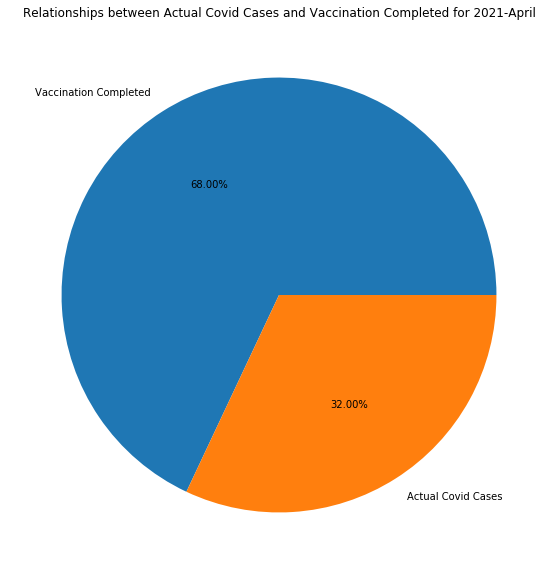

In [14]:
size_04 = [vac21_04,cas21_04]
labels = "Vaccination Completed","Actual Covid Cases",  
plt.figure(figsize=(10,10))
plt.pie(size_04, labels = labels, autopct='%.2f%%')
plt.title('Relationships between Actual Covid Cases and Vaccination Completed for 2021-April')
plt.show()

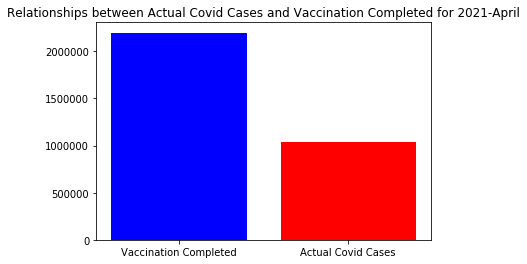

In [15]:
plt.bar(x = labels, height = size_04, color = ("blue", "red"))
plt.title('Relationships between Actual Covid Cases and Vaccination Completed for 2021-April')
plt.show()

# The relationship between Actual cases and Vaccination completed on April 2021

On the month of **April,2021** the number of actual covid cases were leaser than the number of people vaccinated.<br>
As a result of this, the number of new cases at that time were **3848 people** and the number of new death were **29 people**<br>
This made people afraid of the rate at which the pandemic was spreading, that is why many people vaccinated on the month of April.

In [16]:
print(date(2021,5,1).strftime("%d-%B-%Y"))

mounth_05 = cfile.loc["2021-05-01"]
print(mounth_05)
cas21_05 = mounth_05['actuals.cases']
vac21_05 = mounth_05['actuals.vaccinationsCompleted']

01-May-2021
country                                                   US
state                                                     PA
county                                                   NaN
fips                                                      42
lat                                                      NaN
long                                                     NaN
locationId                                iso1:us#iso2:us-pa
actuals.cases                                      1158964.0
actuals.deaths                                       26307.0
actuals.positiveTests                              1199877.0
actuals.negativeTests                             12717231.0
actuals.contactTracers                                  1508
actuals.hospitalBeds.capacity                            NaN
actuals.hospitalBeds.currentUsageTotal               25611.0
actuals.hospitalBeds.currentUsageCovid                2655.0
actuals.hospitalBeds.typicalUsageRate                    NaN
actuals.icuB

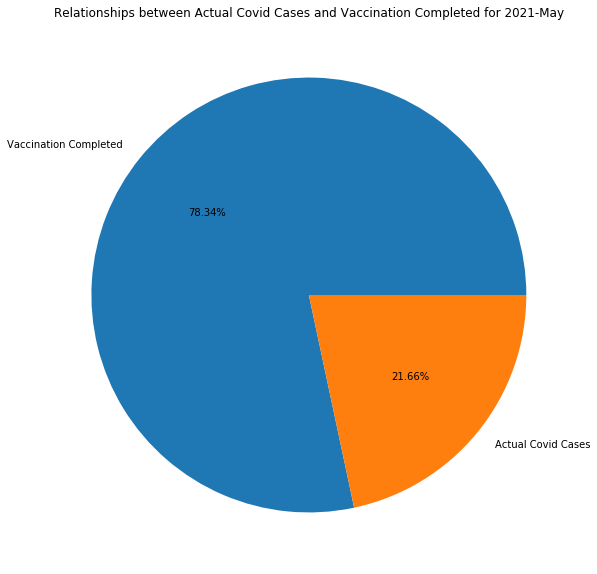

In [17]:
size_05 = [vac21_05,cas21_05]
labels = "Vaccination Completed","Actual Covid Cases",  
plt.figure(figsize=(10,10))
plt.pie(size_05, labels = labels, autopct='%.2f%%')
plt.title('Relationships between Actual Covid Cases and Vaccination Completed for 2021-May')
plt.show()

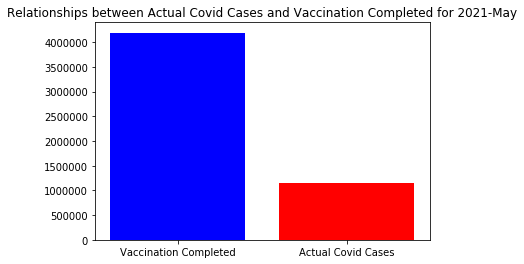

In [18]:
plt.bar(x = labels, height = size_05, color = ("blue", "red"))
plt.title('Relationships between Actual Covid Cases and Vaccination Completed for 2021-May')
plt.show()

# The relationship between Actual cases and Vaccination completed on May 2021


On the month of **May,2021** the number of actual covid cases went very down while the number of people vaccinated increased.<br>
As a result of this, the number of new cases at that time were **2718 people** and the number of new death were **32 people**<br>
Since many people vaccinated, it made the number of new cases went down, but the number of new did increase because of the huge number of new cases in the month of April. 

In [19]:
print(date(2021,6,1).strftime("%d-%B-%Y"))

mounth_06 = cfile.loc["2021-06-01"]
print(mounth_06)
cas21_06 = mounth_06['actuals.cases']
vac21_06 = mounth_06['actuals.vaccinationsCompleted']

01-June-2021
country                                                   US
state                                                     PA
county                                                   NaN
fips                                                      42
lat                                                      NaN
long                                                     NaN
locationId                                iso1:us#iso2:us-pa
actuals.cases                                      1207596.0
actuals.deaths                                       27270.0
actuals.positiveTests                              1240970.0
actuals.negativeTests                             13579083.0
actuals.contactTracers                                  1508
actuals.hospitalBeds.capacity                            NaN
actuals.hospitalBeds.currentUsageTotal               22595.0
actuals.hospitalBeds.currentUsageCovid                1402.0
actuals.hospitalBeds.typicalUsageRate                    NaN
actuals.icu

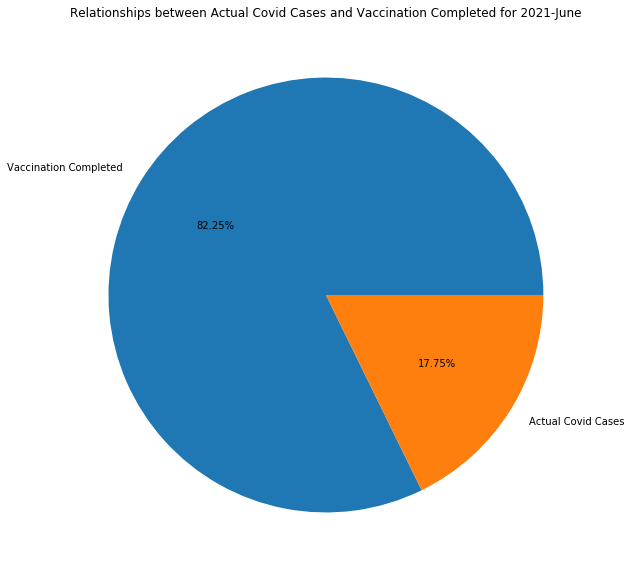

In [20]:
size_06 = [vac21_06,cas21_06]
labels = "Vaccination Completed","Actual Covid Cases",  
plt.figure(figsize=(10,10))
plt.pie(size_06, labels = labels, autopct='%.2f%%')
plt.title('Relationships between Actual Covid Cases and Vaccination Completed for 2021-June')
plt.show()

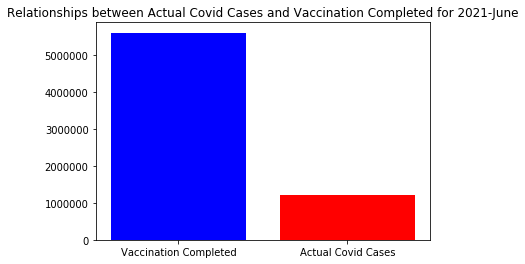

In [21]:
plt.bar(x = labels, height = size_06, color = ("blue", "red"))
plt.title('Relationships between Actual Covid Cases and Vaccination Completed for 2021-June')
plt.show()

# The relationship between Actual cases and Vaccination completed on June 2021


On the month of **June,2021** the number of actual covid cases went very very very down while the number of people vaccinated were still increasing.<br>
As a result of this, the number of new cases at that time were **841 people** and the number of new death were **2 people**<br>

Since many people decided to vacinated in the month of June, the number of new cases went very down and the new death as well.

This means if everybody gets vaccinated, the number of actual cases will be zero. 
**I will recomend that, the key to this pandemic is vaccination.**